In [35]:
import matplotlib.pyplot as plt
import numpy as np
import torch 


from transformers import AutoTokenizer
from transformers import GPT2LMHeadModel

from sklearn.preprocessing import StandardScaler

In [83]:
ws = ' technician, accountant, supervisor, engineer, worker, educator, clerk, counselor, inspector, mechanic, manager, therapist, administrator, salesperson, receptionist, librarian, advisor, pharmacist, janitor, psychologist, physician, carpenter, nurse, investigator, bartender, specialist, electrician, officer, pathologist, teacher, lawyer, planner, practitioner, plumber, instructor, surgeon, veterinarian, paramedic, examiner, chemist, machinist, appraiser, nutritionist, architect, hairdresser, baker, programmer, paralegal, hygienist, scientist, female, woman, girl, sister, she, her, hers, daughter, male, man, boy, brother, he, him, his, son'
ws = ws.strip().split(', ')
ws = [' ' + w for w in ws]
len(ws), ws[:5]

(66, [' technician', ' accountant', ' supervisor', ' engineer', ' worker'])

In [5]:
model = GPT2LMHeadModel.from_pretrained('model_unique_rev_best/')
tok = AutoTokenizer.from_pretrained('gpt2')
tok.add_special_tokens({'pad_token': '<|endoftext|>'})

0

In [6]:
def get_word_vec(text):
    model_inp = tok(text, return_tensors='pt')
    outputs = model(**model_inp, output_hidden_states=True)
    hidden_states = outputs.hidden_states
    final_rep = hidden_states[-1]  # (1, N tokens, 768)
    final_rep = final_rep.mean(axis=1)
    final_rep = final_rep.squeeze()
    return final_rep

In [9]:
get_word_vec(ws[0]).shape

torch.Size([768])

In [84]:
dat = torch.zeros((len(ws), 768))
dat    

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [85]:
for ix, w in enumerate(ws):
    vec = get_word_vec(w)
    dat[ix, :] = vec
    
dat = dat.detach().numpy()
dat

array([[ 0.24856812, -1.0440538 , -0.38530695, ...,  0.03990982,
        -0.10753424,  0.00730459],
       [ 0.24470082, -1.0627973 , -0.32391465, ...,  0.02515118,
        -0.11964516,  0.01268686],
       [ 0.28352463, -0.9936409 , -0.33112872, ...,  0.02041074,
        -0.08235381,  0.01357216],
       ...,
       [ 0.16942759, -1.0756208 , -0.3418127 , ...,  0.03772319,
        -0.12411934, -0.00527881],
       [ 0.17104769, -1.0647882 , -0.38084367, ...,  0.02220581,
        -0.11339206, -0.03194879],
       [ 0.2556951 , -1.0188776 , -0.28324574, ...,  0.05187357,
        -0.12833916, -0.04818548]], dtype=float32)

In [86]:
dat.shape

(66, 768)

In [87]:
scaler = StandardScaler()
scaled_dat = scaler.fit_transform(dat)
scaled_dat

array([[ 0.15342568, -0.54872143,  0.28647512, ..., -0.05758736,
        -0.19219445,  0.10803889],
       [ 0.11968773, -0.6133966 ,  0.5322287 , ..., -0.28732455,
        -0.34637487,  0.14668944],
       [ 0.4583831 , -0.37476996,  0.50335073, ..., -0.3611156 ,
         0.12837   ,  0.1530469 ],
       ...,
       [-0.53698903, -0.6576444 ,  0.4605827 , ..., -0.09162512,
        -0.40333423,  0.0176763 ],
       [-0.52285546, -0.6202663 ,  0.30434167, ..., -0.33317295,
        -0.26676846, -0.17384332],
       [ 0.21560086, -0.46185017,  0.6950264 , ...,  0.12864365,
        -0.45705542, -0.29044047]], dtype=float32)

In [88]:
u, s, vh = np.linalg.svd(scaled_dat, full_matrices=False)

In [89]:
u.shape # each row represents each word

(66, 66)

In [90]:
s.shape, s  # singular values 

((66,),
 array([1.5166562e+02, 6.7020981e+01, 5.9918186e+01, 5.5957623e+01,
        5.4365677e+01, 4.7179371e+01, 4.4650730e+01, 4.0084526e+01,
        3.5854889e+01, 3.5281452e+01, 2.8531898e+01, 2.8244211e+01,
        2.3241951e+01, 2.1388004e+01, 1.9079592e+01, 1.7891777e+01,
        1.5495920e+01, 1.5252658e+01, 1.3422255e+01, 1.0359640e+01,
        9.7154894e+00, 9.0867138e+00, 8.7375326e+00, 8.2000027e+00,
        7.9943213e+00, 7.4346251e+00, 7.2347746e+00, 6.8587890e+00,
        6.2028732e+00, 6.0851569e+00, 5.9021173e+00, 5.6004181e+00,
        5.5461202e+00, 5.3754878e+00, 5.1483464e+00, 4.9374685e+00,
        4.8573346e+00, 4.6973786e+00, 4.5872383e+00, 4.4211125e+00,
        4.3521490e+00, 4.1626630e+00, 4.0858936e+00, 3.9036441e+00,
        3.7793009e+00, 3.6867499e+00, 3.6011930e+00, 3.5257838e+00,
        3.3527265e+00, 3.2879279e+00, 3.2173471e+00, 3.1983557e+00,
        3.1043174e+00, 2.8944790e+00, 2.7493868e+00, 2.6387064e+00,
        2.4001439e+00, 2.2275383e+00, 2.

In [91]:
vh.shape  # 

(66, 768)

In [106]:
mode_id = 33

u_vec = u[:, mode_id]
v_vec = vh[mode_id, :]

mode_mat = np.outer(u_vec, v_vec)
mode_mat.shape

(66, 768)

In [107]:
word_scores = []
for word_idx, w in enumerate(ws):
    w_vec = mode_mat[word_idx, :]
    score = np.abs(w_vec).sum()
    word_scores.append((word_idx, w, score))
    
word_scores.sort(key=lambda vs: vs[2], reverse=True) 
word_scores

[(9, ' mechanic', 6.874647),
 (53, ' sister', 5.923894),
 (38, ' examiner', 5.726362),
 (60, ' boy', 4.89617),
 (25, ' specialist', 4.5781574),
 (12, ' administrator', 4.3854876),
 (61, ' brother', 4.254018),
 (63, ' him', 4.1390166),
 (8, ' inspector', 4.1109896),
 (49, ' scientist', 4.008645),
 (4, ' worker', 3.9473076),
 (30, ' lawyer', 3.9233744),
 (52, ' girl', 3.8177023),
 (36, ' veterinarian', 3.6647677),
 (43, ' architect', 3.605435),
 (2, ' supervisor', 3.5469499),
 (6, ' clerk', 3.4975562),
 (51, ' woman', 3.2624269),
 (22, ' nurse', 3.251114),
 (10, ' manager', 3.008918),
 (46, ' programmer', 2.5375538),
 (3, ' engineer', 2.5151217),
 (27, ' officer', 2.4259126),
 (39, ' chemist', 2.314632),
 (59, ' man', 2.2032294),
 (29, ' teacher', 2.0849805),
 (64, ' his', 2.0332139),
 (19, ' psychologist', 1.9378746),
 (56, ' hers', 1.6397527),
 (65, ' son', 1.4577823),
 (11, ' therapist', 1.1766381),
 (1, ' accountant', 1.1376203),
 (58, ' male', 1.0132759),
 (35, ' surgeon', 0.9944718

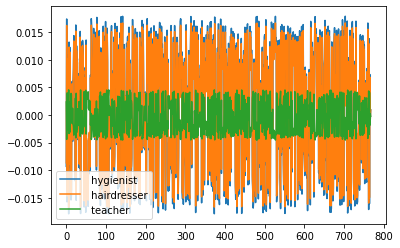

In [82]:
# for word_idx, w in enumerate(ws):
word_idx = 48
w_vec = mode_mat[word_idx, :]
plt.plot(list(range(w_vec.shape[0])), w_vec, label=ws[word_idx])

word_idx = 44
w_vec = mode_mat[word_idx, :]
plt.plot(list(range(w_vec.shape[0])), w_vec, label=ws[word_idx])

word_idx = 29
w_vec = mode_mat[word_idx, :]
plt.plot(list(range(w_vec.shape[0])), w_vec, label=ws[word_idx])


plt.legend()
# plt.tight_layout()

plt.show()